# Allgemeines 

## Plotten
```python
# Numpy importieren und Text laden
import numpy as np
data = np.loadtxt("meine_textdatei.txt", delimiter=",")
# Matplotlib
import matplotlib.pyplot as plt
plt.xlabel('Text')
plt.ylabel('Text')
plt.title('Text')
plt.axis([xmin, xmax, ymin, ymax])
plt.plot(xdata, ydata 'b-') # plotten
plt.show()
plt.grid(True) # Gitternetzlinien
plt.show()
# daten splitten
x_train, x_test, y_train, y_test = split(data[:,:2], data[:,2], test_size=0.2)
```

In [1]:
# Alle benötigten Module laden
import matplotlib.pyplot as plt
import seaborn as sns  # Schönere Grafiken, wird für IDS nicht benötigt 
import numpy as np
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score as score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tensorly as tl # Für Tensoren
from tensorly.decomposition import parafac ## parafac faktoriesierung
from tensorly.decomposition import tucker ## Tucker faktorisierung
# Python modul aus lokalem Verzeichnis laden
from mytensor import gen_tensor_one_feature as gen1f
from mytensor import plot_uvw_one_feature as plot1f

# Lineare regression

- eine der am meisten genutzten statistischen Methoden
- drückt die mathematische Beziehung zwischen zwei Variablen aus
- Annahme: lineare Zusammenhang zwischen Antwort- und Prädiktorvariable
- Linearität vereinfacht möglichen tatsächlichen Zusammenhang, ABER sie ist ein guter Startpunkt für weitere Untersuchungen

Beispiele:

1. je mehr Waren verkauft werden, desto höher der Umsatz
    = linearer Zusammenhang 
2. jede infizierte Person, steckt zwei weitere Personen an
    b) Exponentieller Zusammenhang (Wachstum), Kein linearer Zusammenhang. Daten liegen nicht auf einer geraden:
    Keine lineare Regression versuchen 
    
### warum lineare Regression…?
- um Beziehungen besser zu verstehen / besser beschreiben zu können
- etwa: gibt es einen Zusammenhang zwischen Anzahl der Freunde in sozialen Medien und der Zeit, die eine Person täglich auf derartigen Plattformen verbringt

## Ausgangspunkt: Geradengleichung

$ y=f(x) = \beta_0 + \beta_1 * x$

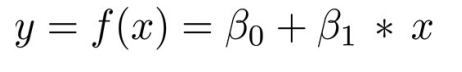

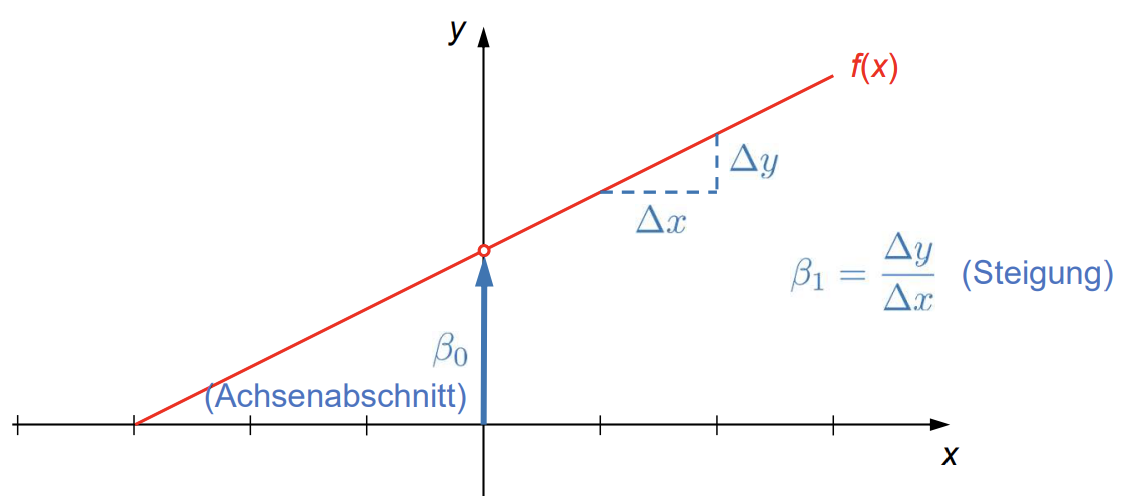

## Lineare Regression durchführen
```python
from sklearn.linear_model import LinearRegression as lr
model = lr()
model.fit(xdata, ydata)
#- Problem: xdata ist Spaltenvektor
xdata = data[:,0].reshape((-1, 1))
ydata = data[:,1]
# -> Bedeutung von (-1, 1): unbekannte Anzahl an Zeilen bei genau einer Spalte -> Spaltenvektor
y_pred = model.predict(xdata)
plt.plot(xdata, y_pred, 'b-') # plotten
plt.plot(data[:,0], data_y, 'ro')
plt.plot(data_x, y_pred, 'b-')
plt.show()
```
**$\beta_0$ und $\beta_1$**
```python
beta0 = model.intercept_
beta1 = model.coef_
print(beta0, beta1)
```

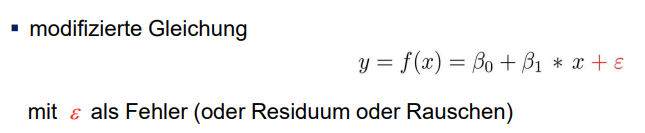

**MSE (mean square error - mittlere quadratische abweichung**
- MSE ist ein gutes Mass für die Varianz (vgl. Varianz aus der Statistik), d.h. wie stark die vorhergesagten Werte $(ŷ_i)$ von den tatsächlichen / beobachteten Werten $(y_i)$ variieren

```python
from sklearn.metrics import mean_squared_error as mse
mse(y_true, y_pred, squared=true) # sonst wird RSME wiedergegeben   

```

**$R^2$**
- Je näher bei 1, desto genauer liegt die gerade auf allen punkten
- berechnen


```python
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

```

### Kreuzvalidierung 

```python
# grösse des datensatzes herausfinden
split= int(x_data.size)
x_train = x_data[:-split]
x_test = x_data[-split:]
y_train = y_data[:-split]
y_test = y_data[-split:]
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
plt.plot(x_test,y_test,'ro')
plt.plot(x_test,y_pred,'b-')
plt.show()
```

# k-Nächste-Nachbarn

- Ausgangssituation
    - Punktewolke von bereits klassifizierten Objekten (z.B. Krebsrisiko bei Patienten)
    - neue, unklassifizierte Patienten sollen aufgenommen und klassifiziert werden
    - Frage: lineare Regression ja oder nein…?
- LR grundsätzlich möglich, ABER
    - keine kontinuierliche, sondern kategoriale Variable
    - Modellierung als verschiedene Bereiche (z.B. 'gering', 'mittel', 'hoch', 'sehr hoch', …)
    - nicht für alle Probleme umsetzbar (z.B. 'vermutlich Demokrat', 'vermutlich Republikaner', …)
    - anderes Konzept notwendig →***k-NN***
    
## Idee k-NN

1. betrachte ähnliche Objekte (im Hinblick auf ihre Attribute)
2. entscheide bzgl. deren Klassifizierung (Mehrheitsentscheid)
3. bei Gleichstand entscheide zufällig (aus den Mehrheiten)

## Umsetzung / Einzelschritte

1. Ähnlichkeits- oder Distanzmetrik
2. Klassifikationsalgorithmus
3. Festlegung Bewertungsmass
4. Aufteilung der klassifizierten Daten in Trainings- und Testdaten
5. mehrere Durchläufe k-NN für unterschiedliche Werte von k
6. wähle k bzgl. bester erreichter Bewertung
7. Klassifikation neuer Daten
- Prinzip / Theorie soweit klar, ab zur Mathematik…

## Ähnlichkeits- oder Distanzmetrik

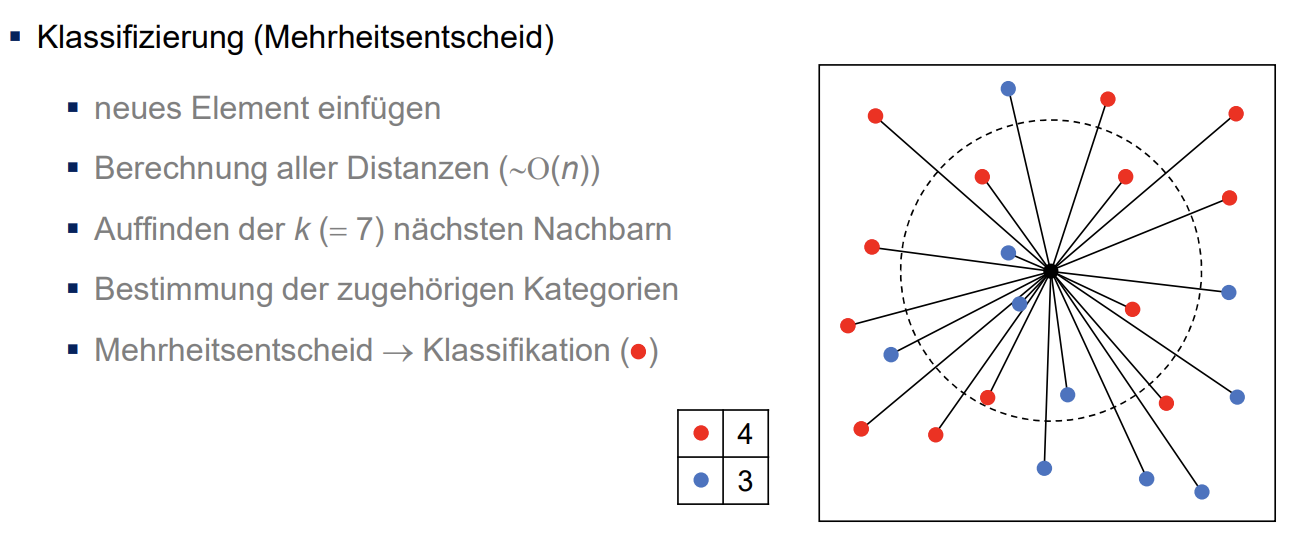


## Bewertungsmass

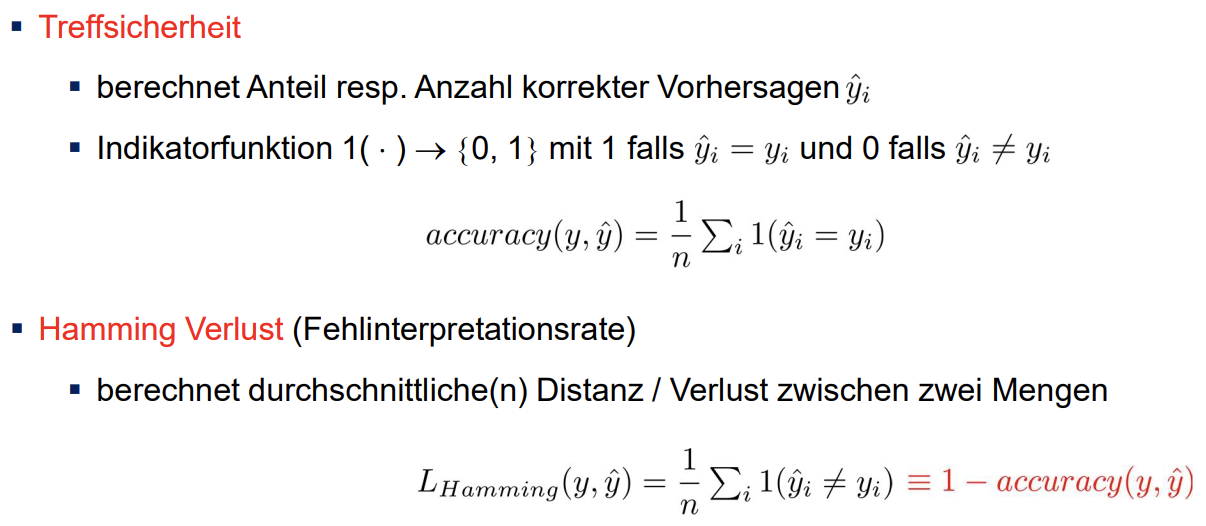

- Treffsicherheit = (Anzahl korrekter Vorhersagen)/(Anzahl Werte) # Kann auch in Prozent angegeben werden
- Hamming Verlust 1 - Treffsicherheit
    - Hamming Verlust = Wieviele sind Falsch klassifiziert (Gegenstück zur Treffsicherheit)

## k-NN: Daten plotten
- Erste und zweite spalte = Daten , dritte spalte = Klassifizierung
```python
# Daten Plotten 
plt.axis([10,80,0,120])
colors = ['red', 'blue'] # Array mit den beiden farben 
# Farbcodierungen in Colormap speichern 
import matplotlib.colors 
cmap = matplotlib.colors.ListedColormap(colors)
plt.scatter(data[:,0], data[:,1], c=data[:,2], cmap=cmap)
plt.show()
cmap
````



## Modell aufsetzen und trainieren (Kreuzvalidierung)
```python
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import accuracy_score as score
x_train, x_test, y_train, y_test = split(data[:,:2], data[:,2], test_size=0.2)
model = knn(n_neighbors=k)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score(y_test, y_pred)
````

# k-Mitten
- was bisher geschah...
    - überwachtes Lernen (*k-NN*)
    - 'korrekte' Antwort (d.h. Klassifizierung) a-priori bekannt
    - Modell damit bestmöglich trainiert (hohe Treffsicherheit ./. geringer Verlust)
- was ist jetzt anders…?
    - Ausgangslage: unklassifizierte Daten
    - 'korrekte' Antwort resp. irgendeine Antwort nicht bekannt
    - überwachtes Lernen nicht anwendbar
    - unüberwachtes Lernen
    - Algorithmus der Stunde: *k-Mitten* (engl. *k-means*)
- Idee
    - Klassifikation der Daten durch Clusterbildung (Gruppen)
    - Cluster sollen Elemente mit ähnlichen Attributen enthalten
- Gedankenexperiment: manuelle Eingruppierung
    - Daten enthalten Alter, Geschlecht, Einkommen, Kanton, Haushaltsgrösse
    - Festlegung von Bereichen / Gruppen (z.B. Alter 20-24, 25-29, …)
    - Ergebnis: Alter (10-Kategorien), Geschlecht (3), Einkommen (20), Kanton (26), Haushaltsgrösse (3)
    - daraus folgt: 5-dimensionaler Raum mit 10x3x20x26x3=46'800 Einträgen
        - Ist ein bisschen gross (sogar für Statistiker)
    - → Ausweg: Gruppierung der Gruppen (der Gruppen (der Gruppen (…)))
        - Manuelle Gruppierung

## Ellenbogenmethode
- k-Mitten versucht, die Trägheit (inertia) bzgl. der Mittelpunkte zu minimieren
- Trägheit des Modells: model.inertia_
- guter k-Wert am Knick des Ellenbogens

## Bester k-Wert für k-means herausfinden (Ellenbogen-Methode)
```python
x_data = data[:,:2] # Spalten 0 und 1 -> Koordinaten
y_data = data[:,2] # Spalte 2 -< korrekte Klassifikation
inert = []
for k in range(1,11):
    model = KMeans(k)
    model.fit(x_data)
    inert.append(model.inertia_)
x = np.linspace(1,10,10)
plt.plot(x, inert, ‘b-’)
plt.plot(x, inert, ‘bo’)
plt.show() 
````

## Clustern
```python
# Medell erzeugen (default=8, iterationsgrenze 300 )
model = KMeans(n_clusters=3, max_iter=300)
# klassifiziere mir meine Daten 
y_pred = model.fit_predict(data)
colors = ['red', 'blue', 'green']
cmap = matplotlib.colors.ListedColormap(colors)
plt.scatter(data[:,0], data[:,1], c=y_pred, cmap=cmap)
#plt.scatter(data[:,0], data[:,1], c=y_pred)
plt.show()
```


# Lineare Algebra

- Nomenklatur
    - Skalare: $s$
    - Vektoren: $\vec{u}$ (1D Reihung)
    - Matrizen: $A$ (2D Reihung)
    

- Operationen 
    - Skalarprodukt: $\vec{v}^T \cdot \vec{w} = s$
    - dyadisches Produkt: $\vec{v} \cdot \vec{w}^T = A$
    - Matrix-Vektor-Multiplikation: $A \cdot \vec{v} = \vec{w}$
    - Matrix-Vektor-Multiplikation: $A \cdot B = C$
    - Kronecker-Produkt: $A\otimes B = C$ 
    - Khatri-Rao-Produkt: $A\odot B = C$
    - Hadamard-Produkt: $A\ast B = C$


```python
# Erzeugen eines 0- und 1-Vektors
null_vec = np.zeros(10)
eins_vec = np.ones(10)
# Transponieren eines Vektors und Berechnung der Vektorlänge (Euklid'sche oder 2-Norm)
np.transpose(null_vec)
np.linalg.norm(eins_vec)
# Berechnung des Skalarprodukts (zeigt, ob Vektoren Orthogonal sind (wenn Produkt = 0)
np.dot(null_vec, eins_vec)

# Erzeugen einer 0- und 1-Matrix
null_mat = np.zeros([5, 5])
#eins_mat = np.ones([m, n])
matrix = np.arange(25)
matrix = matrix + 1 # null fällt weg
matrix = np.reshape(matrix,(5,5)) # reshape((#zeilen,#spalten)). macht aus dem vektor mit der länge 25 ein array von 5x5
matrix
np.transpose(matrix) # transponieren
matrix
# Norm der Matrix bestimmen: Welches Potential/gewicht hat die Matrix
np.linalg.norm(matrix)
# Matrix mit vektor multiplizieren: Reduziert die Dimensionen
np.dot(A, vec)
# dyadisches Produkt berechnen (ergibt eine Matrix)
np.outer(u,v)
# dyadisches Produkt berechnen (via Einsteinprodukt)
np.einsum('i,j->ij',u,v) 
# Für Tensor erzeugen, weiteren index hinzufügen 
np.einsum('i,j,k -> kij', u,v,w)
# Tensorprodukte erzeugen 
tl.tenalg.kronecker((A, B)) # Kronecker-Produkt
tl.tenalg.khatri_rao((A, B)) # Khatri-rao-Produkt
A*B # Hadamard-Produkt
```

# Hauptkomponentzerlegung

- Wie kann ich das Rauschen entfernen
- Wie kann ich Dimensionen reduzieren damit es weniger aufwendig ist

- Lost in Dimension – Geschichten aus der n-ten Dimension
    - nochmal k-NN
    - Klassifizierung basiert auf nächsten Nachbarn (bzw. deren Klassifizierung)
    - Beispiel Empfehlung: Vorlieben Nutzer*in A basieren auf Vorlieben der nächsten Nachbarn
- ABER
    - Fluch der Dimension: nächste Nachbarn nicht mehr wirklich 'nahe' (> 1-3 Dimensionen)
        - Je höher die Dimension, destö komplexer die Probleme
    - Overfitting: nächster Nachbar könnte nur 'Rauschen' (noise) darstellen
    - Wichtung: manche Attribute sind wichtiger / prägnanter als andere
    - Komplexität: je höher die Dimension, desto höher die Berechnungskosten
- Idee
    - Dimensionsreduktion auf wenige (latente) Attribute


## Wieviel Hauptkomponenten werden benötigt um den grössten Teil der Varianz zu erklären 
- 
```python
varianz = [0., 80., 18., 1., 0.25, 0.25, 0.25, 0.25, 0.]
#x = np.linspace(0, 8, 9) oder einfach
x = [0., 1., 2., 3., 4., 5., 6., 7., 8.]
plt.xlabel('Hauptkomponenten')
plt.ylabel('Varianz [%]') 
plt.axis([0,8,0,110]) 
plt.plot(x, np.cumsum(varianz), 'r-') 
print(x)
plt.show()
```

## Hauptkomponentenzerlegung (Pricipal Component Analysis) durchführen 
```python
from sklearn.decomposition import PCA
model = PCA(n_components=2) # reduktion auf zwei komponenten
# Projiziere die daten gleich anhand der Projektion
data_proj = model.fit_transform(data) # falls ein bunch importiert wurde: objekt.data!
# data_proj hat keine x,y sondern die Projizierten koordinaten aller punkte auf der x-achse und alternativ aller punkte auf der X-achse
model.components_ # liefert die Vektoren, aber nicht transponiert 
np.transpose(model.components_)
np.dot(np.transpose(model.components_)[:,0],np.transpose(model.components_)[:,1]) # sollte 0 sein
model.explained_variance_ratio_ 
# Vieviel % der Information steckt entlang der jeweiligen Komponenten
plt.scatter(data_proj[:,0], data_proj[:,1], c=data.target) # plotten
plt.show()
# Erklärte Varianz der PCA anzeigen lassen 
np.sum(model.explained_variance_ratio_)
```


# Tensorfaktorierung 

## Tensoren
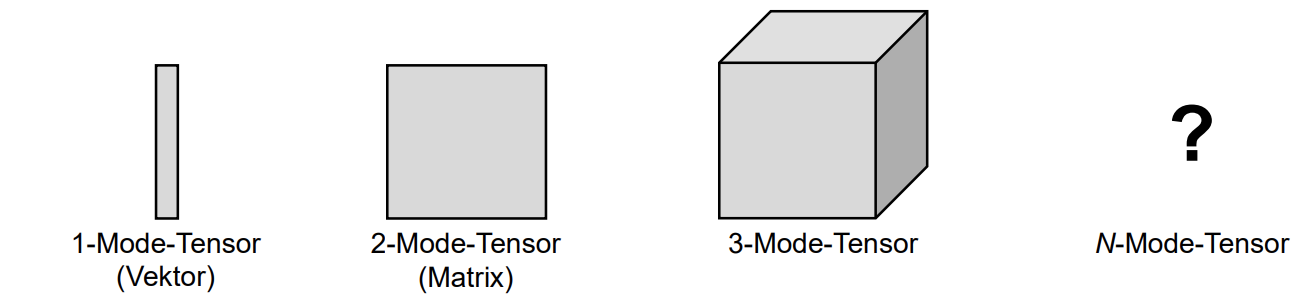

### Tensorelemente 
- $i$-tes Element eines Vektors $\vec{v} \rightarrow v_i$ 
- Element $(i,j)$ einer Matrix $A \rightarrow a_{ij}$
- Element $(i,j,k)$ eines 3-Mode-Tensors  $\chi \rightarrow a_{ijk}$

```python
import tensorly as tl
# Für Tensor aus Vektoren erzeugen, weiteren index zum äusseren Produkt hinzufügen 
np.einsum('i,j,k -> kij', u,v,w)
#Matrix mit Reshape aus liste erzeugen
matrix = np.reshape(liste,(5,5)) 
# Tensorprodukte erzeugen 
tl.tenalg.kronecker((A, B)) # Kronecker-Produkt
tl.tenalg.khatri_rao((A, B)) # Khatri-rao-Produkt
A*B # Hadamard-Produkt
```

### Tensor erzeugen
```python
X = np.arange(50).reshape((5,2,5)) 
X = X + 1 
# Schichten ansehen
X[:,:,0]
X[:,:,1]

# Erzeugung eines Tensors mit Floats für die Faktorisierung
X = np.arange(24.).reshape((3, 4, 2))
X = X + 1 # Zahlen liegen in [0,23] -> Zahlen liegen in [1,24]
X
```


### Tensorschichten
- zweidimensionaler Ausschnitt eines Tensors
- Entstehung durch 'Festhalten' aller Indizes bis auf zwei

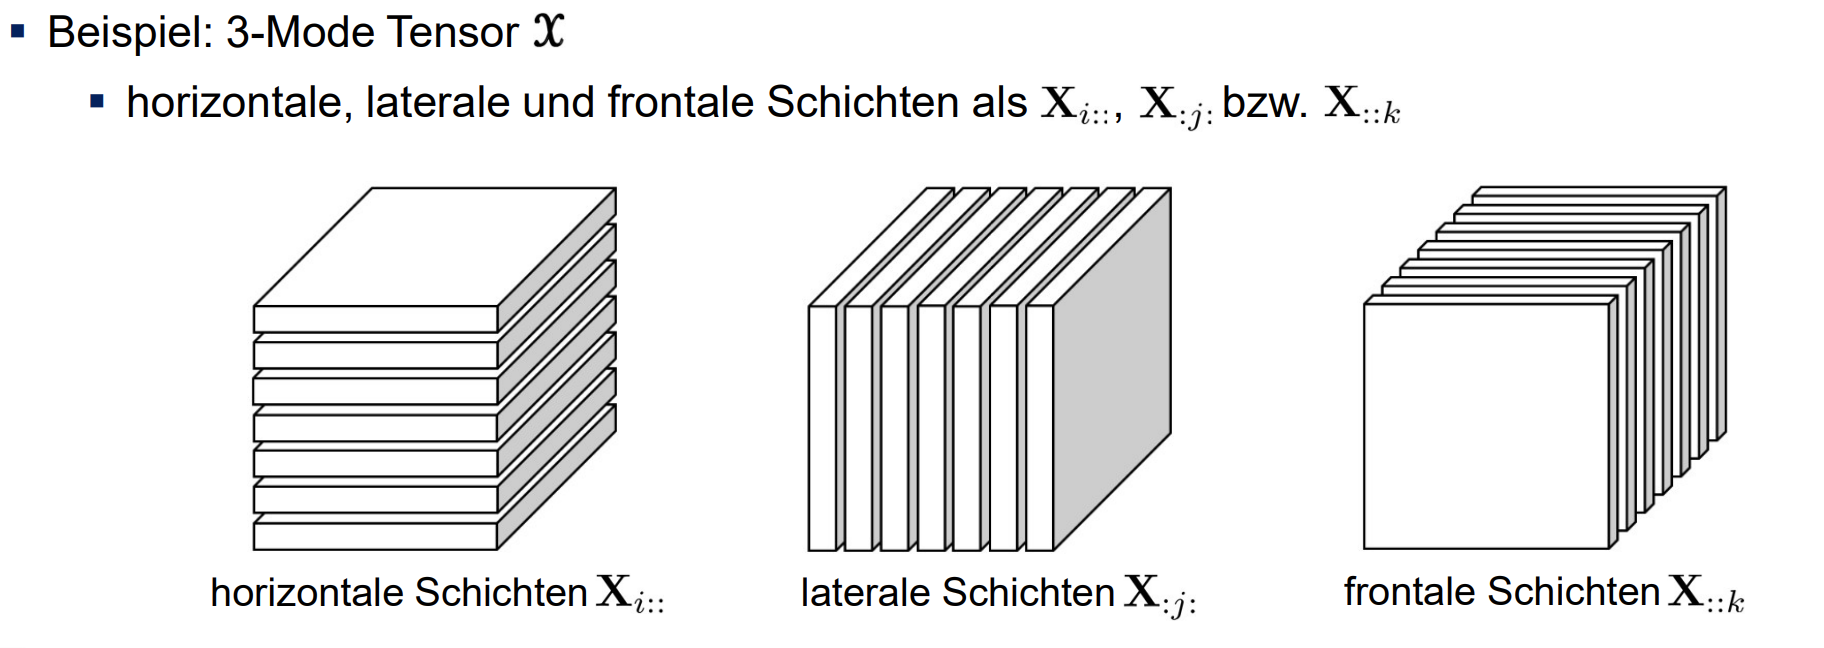


### Tensorfasern
- höherdimensionales Analogon zu Zeilen / Spalten einer Matrix
- Entstehung durch 'Festhalten' aller Indizes bis auf einen

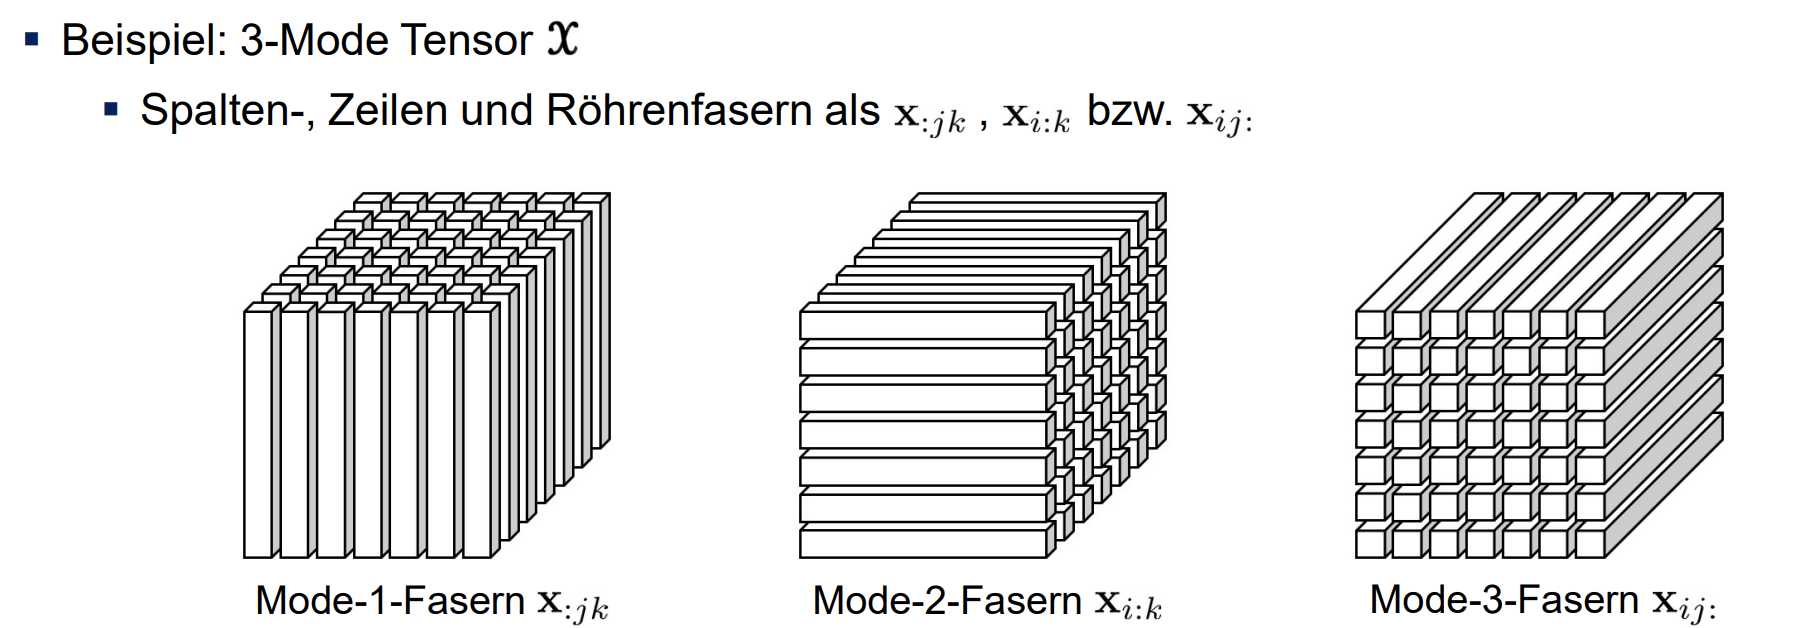

Problem: Wir haben bis jetzt immer mit zweidimensionalen Datenstrukturen gearbeitet. 
Wie können wir auf die gleiche Art mit n-dimensionalen Tensoren arbeiten:

### Matrifizierung (Entfaltung / Ebnung eines Tensors)

- Idee: Umordnung der Elemente eines N-Mode Tensors in eine Matrix

#### Mode-$n$-Entfaltung $X_\left(0\right) , X_\left(1\right) , X_\left(2\right)$
```
tl.unfold(X, 0)
tl.unfold(X, 1)
tl.unfold(X, 2)
```


## Tensorfaktorisierung 
### CP-Faktorisierung $$X -> [[A_1,A_2,A_3]]$$
```python
from tensorly.decomposition import parafac
fac = parafac(X, 1) # 1 Rang-1 Tensor erstellen
fac = parafac(X, 2) # 2 Rang-1 Tensor erstellen
fac[0] # Gewichte, welche ignoriert werden könne (lambda)
# Vektoren der Zerlegung ausgeben 
print(fac[1][0])
print(fac[1][1])
print(fac[1][2])

# Tensor aus Faktormatrizen Rekonstruieren
X_rec = tl.kruskal_to_tensor(fac)
X_rec

X - X_rec # Fehler einzeln anzeigen lassen
tl.norm(X - X_rec)
# alle Fehlerwerte berechnen (Wurzel der Summe der quadrierten Fehler)
Die Resultate sehen für jede Berechnung unterschiedlich aus, da die Faktoriesierung jeweils mit randomisierten werten startet.
```

#### Beispiel Bildzerlegung
```python
#Bildzerlegung in einer Schleife 
rank = [1, 5, 10, 25, 50, 100, 200]
for r in rank:
    fac = parafac(img,r)
    img_rec = tl.kruskal_to_tensor(fac)
    plt.imshow(img_rec, cmap="gray")
    plt.show()
```


### Tucker-Faktorisierung 
```python
Berechnet fehlerwerte
from tensorly.decomposition import tucker ## Tucker faktorisierung
err = [] 
for r in range(1,51):
    G, fac = tucker(X, (r, r, r))
    X_rec = tl.tucker_to_tensor((G, fac))
    err.append(tl.norm(X - X_rec)) 
plt.plot(err, 'r-')
plt.show() 
tl.norm(X - X_rec) # Summe der Fehlerwerte
```
### Analyse mehrdimensionaler Daten mit Tensorfaktorierung
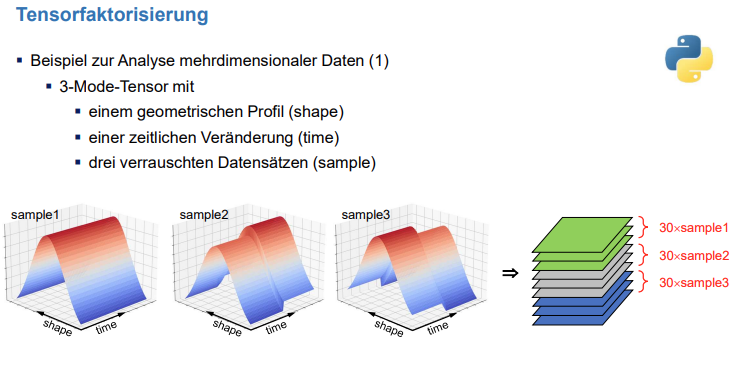
```python
# Python modul aus lokalem Verzeichnis laden
from mytensor import gen_tensor_one_feature as gen1f
from mytensor import plot_uvw_one_feature as plot1f
# Tensor konstruieren
X = gen1f()
X.shape
w_, fac = parafac(X, 1) # Tensor mit Rang 1 Faktorieren (da wir noch nichts wissen). Gewichtung separat als w_
fac
# Alle drei Vektoren visualisieren 
plot1f(fac) # einzelne Werte plotten
```